In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [0]:
import torch

**Train Dataset**

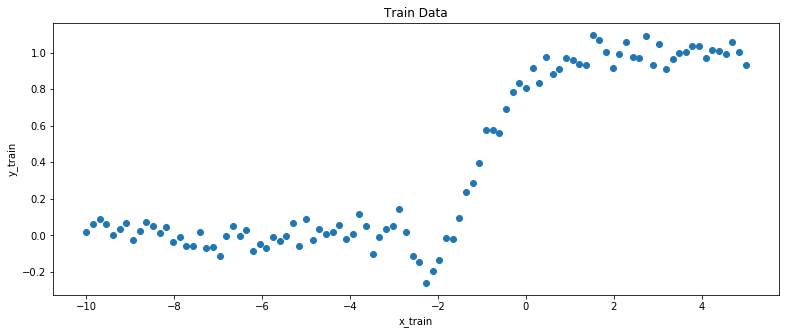

In [3]:
x_train = torch.linspace(-10, 5, 100)
y_train = 2**x_train * torch.sin(2**-x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('Train Data');
plt.xlabel('x_train')
plt.ylabel('y_train');

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

**Validation Dataset**

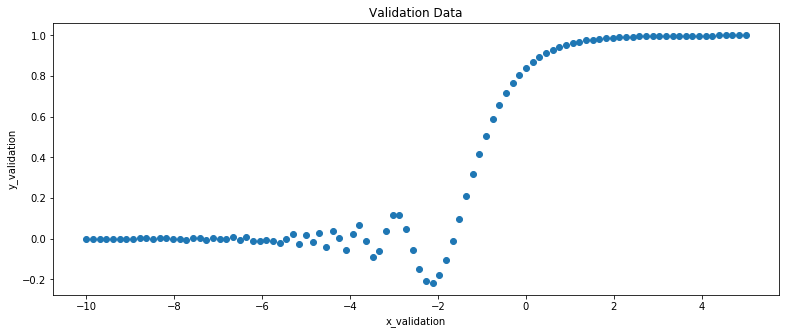

In [5]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = 2**x_validation * torch.sin(2**-x_validation)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('Validation Data')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

**Model Construction**

In [0]:
class RegressionNet(torch.nn.Module):
  def __init__(self, n_hid_neurons):
    super(RegressionNet, self).__init__()
    self.fc1  = torch.nn.Linear(1, n_hid_neurons)
    self.act1 = torch.nn.Tanh()               
    self.fc2  = torch.nn.Linear(n_hid_neurons, n_hid_neurons)
    self.act2 = torch.nn.Tanh()               
    self.fc3  = torch.nn.Linear(n_hid_neurons, 1)
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

In [0]:
regress_net = RegressionNet(40)

**Prediction**

In [0]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label='Ground Truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')

**Optimizer**

In [0]:
optimizer = torch.optim.Adam(regress_net.parameters(), lr=0.01)

**Loss Function**

In [0]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

**Metric**

In [0]:
def metric(pred, target):
    return (pred - target).abs().mean()

**Training Procedure**

In [133]:
for epoch_index in range(500):
  optimizer.zero_grad()

  y_pred = regress_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()
  if epoch_index % 50 == 0:
    print(epoch_index, loss_val.data)

  optimizer.step()

0 tensor(0.4198)
50 tensor(0.0060)
100 tensor(0.0042)
150 tensor(0.0040)
200 tensor(0.0038)
250 tensor(0.0036)
300 tensor(0.0035)
350 tensor(0.0033)
400 tensor(0.0032)
450 tensor(0.0031)


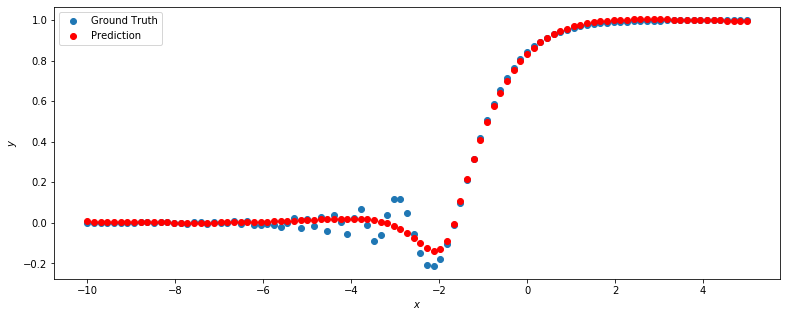

In [134]:
predict(regress_net, x_validation, y_validation)

In [135]:
print(metric(regress_net.forward(x_validation), y_validation).item())

0.017342884093523026
